In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Configuraciones generales
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Cargar el dataset
df = pd.read_csv("limpieza_y_extraccion_de_datos/datasets/startups_para_modelar.csv", sep=",")

In [5]:
df= df.drop(columns=['nombre_de_la_empresa', 'fecha_de_fundacion','estado_operativo', 
                     'estado_operativo', 'fecha_de_ultima_financiacion'], errors='ignore')

In [6]:
# Vista general
print(df.shape)

(678, 22)


In [7]:
print(df.dtypes)

numero_de_marcas_registradas                         int64
numero_de_patentes_otorgadas                         int64
categoria                                           object
antiguedad_de_la_empresa                             int64
empleados_en_linkedin                              float64
seguidores_en_linkedin                             float64
seguidores_en_facebook                             float64
seguidores_en_twitter                                int64
numero_de_articulos                                  int64
numero_total_de_fundadores                         float64
numero_de_mujeres_fundadores                         int64
numero_de_hombres_fundadores                         int64
financiacion_total_por_acciones                    float64
ultima_financiacion_por_acciones                   float64
numero_de_inversiones_en_rondas_de_financiacion      int64
numero_de_inversionistas                             int64
numero_de_inversionistas_principales               float

In [8]:
# Configuramos propiedades de visualización para resaltar las primeras filas
df.head(3).style.set_properties(**{'background-color': 'pink', 'color': 'black', 'border-color': 'darkblack'})


,numero_de_marcas_registradas,numero_de_patentes_otorgadas,categoria,antiguedad_de_la_empresa,empleados_en_linkedin,seguidores_en_linkedin,seguidores_en_facebook,seguidores_en_twitter,numero_de_articulos,numero_total_de_fundadores,numero_de_mujeres_fundadores,numero_de_hombres_fundadores,financiacion_total_por_acciones,ultima_financiacion_por_acciones,numero_de_inversiones_en_rondas_de_financiacion,numero_de_inversionistas,numero_de_inversionistas_principales,financiacion_total,numero_de_rondas_de_financiacion,tipo_de_ultima_financiacion,monto_de_ultima_financiacion,años_desde_ultima_financiacion
0,0,0,Software y Servicios B2B,5,68.000000,12000.000000,4100.000000,0,28,3.000000,0,3,10300000.000000,2500000.000000,0,17,2.000000,10300000.000000,4,series_a,2500000.000000,0.865753
1,0,0,Finanzas,5,15.000000,6000.000000,5300.000000,387,17,3.000000,1,2,6114000.000000,979000.000000,0,10,3.000000,6114000.000000,4,seed,979000.000000,0.775342
2,0,0,Consumo,5,29.000000,7000.000000,0.000000,0,6,2.000000,0,2,19850000.000000,17000000.000000,0,15,3.000000,19850000.000000,3,series_a,17000000.000000,3.375342


       numero_de_marcas_registradas  numero_de_patentes_otorgadas  \
count                    678.000000                    678.000000   
mean                       0.603245                      0.663717   
std                        1.521036                      2.968403   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                        0.000000                      0.000000   
75%                        1.000000                      0.000000   
max                       14.000000                     39.000000   

       antiguedad_de_la_empresa  empleados_en_linkedin  \
count                678.000000             678.000000   
mean                   7.491150              77.134218   
std                    1.648349             155.961329   
min                    5.000000               1.000000   
25%                    6.000000               8.000000   
50%                    7.00000

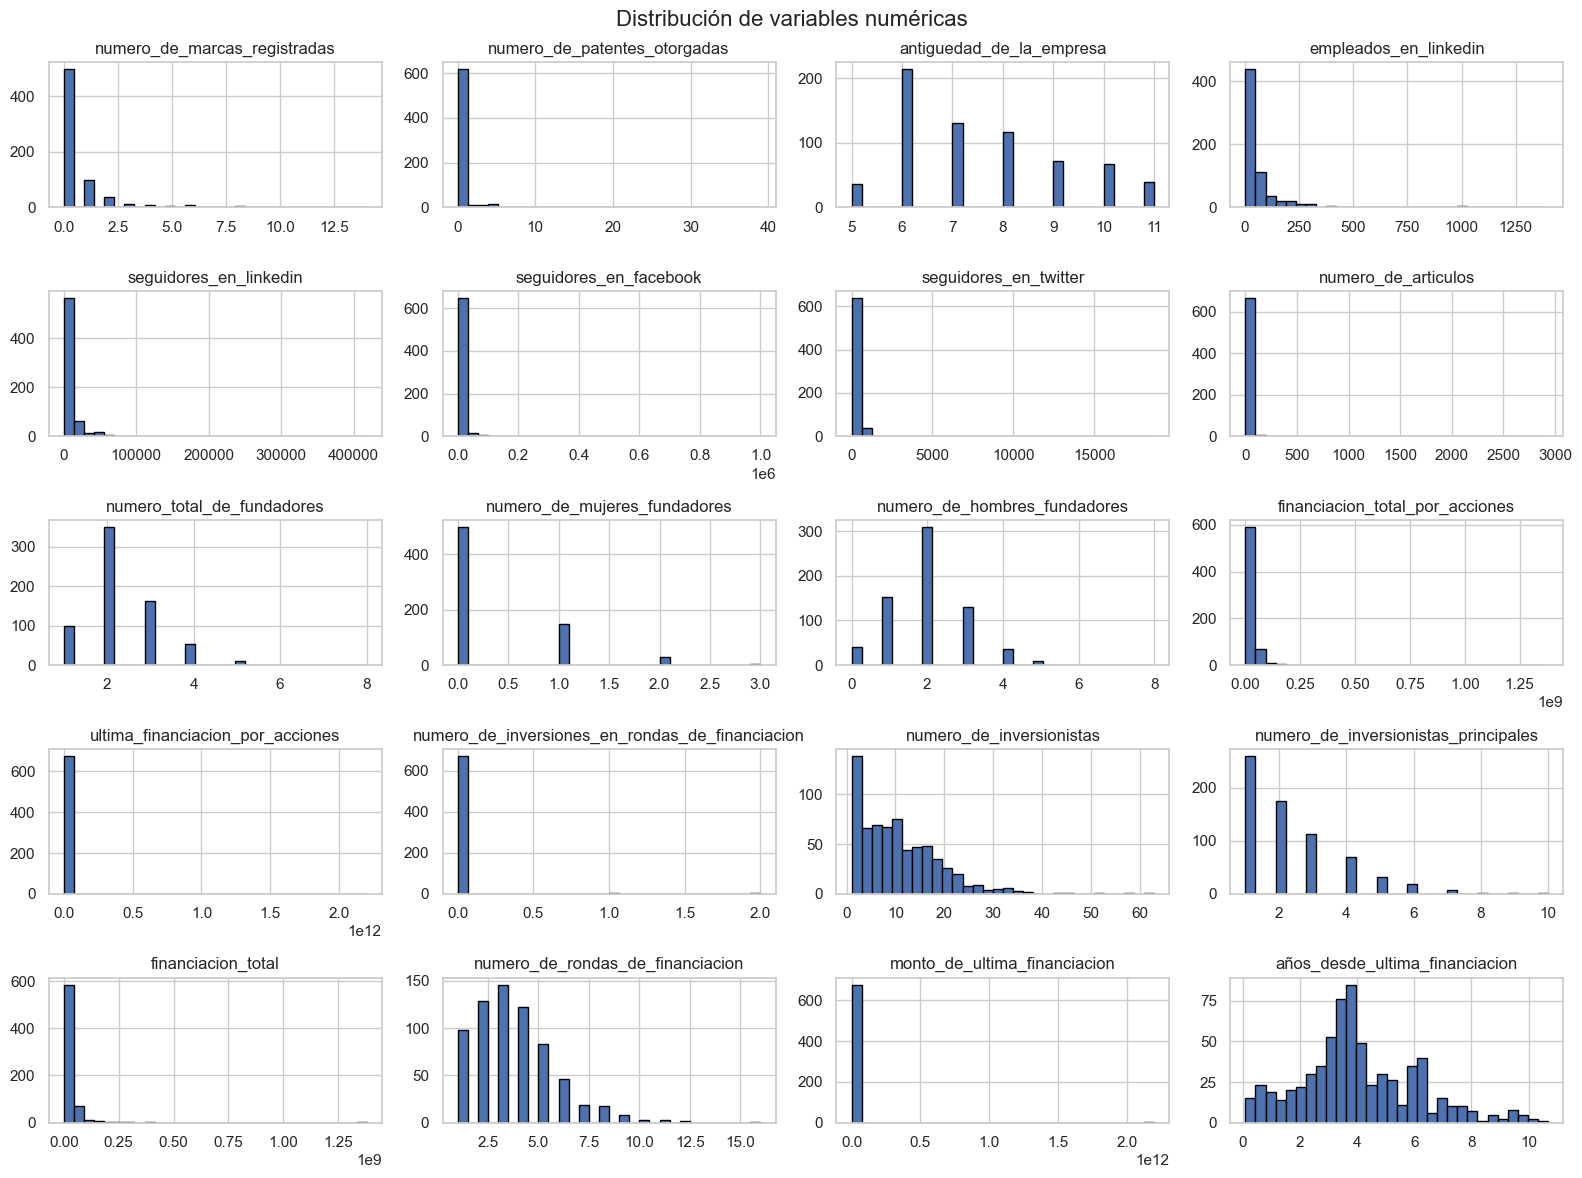

In [9]:
# Estadísticas descriptivas
print(df.describe())

# Histogramas
df.select_dtypes(include='number').hist(bins=30, figsize=(16, 12), edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()



categoria - Valores únicos:
categoria
Software y Servicios B2B        343
Finanzas                        114
Salud                            57
Educación                        39
No Especificado                  33
Bienes Raíces y Construcción     31
Industria                        31
Consumo                          30
Name: count, dtype: int64

tipo_de_ultima_financiacion - Valores únicos:
tipo_de_ultima_financiacion
seed        273
series_a    199
series_b    115
pre_seed     90
angel         1
Name: count, dtype: int64


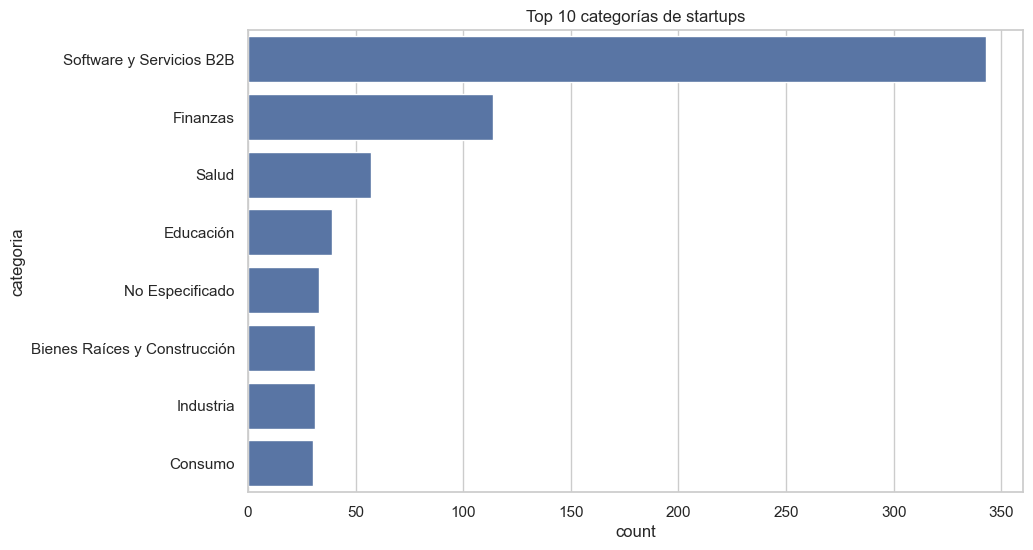

In [10]:
# Variables categóricas más frecuentes
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n{col} - Valores únicos:")
    print(df[col].value_counts().head(10))

# Categorías más comunes
sns.countplot(data=df, y="categoria", order=df["categoria"].value_counts().head(10).index)
plt.title("Top 10 categorías de startups")
plt.show()


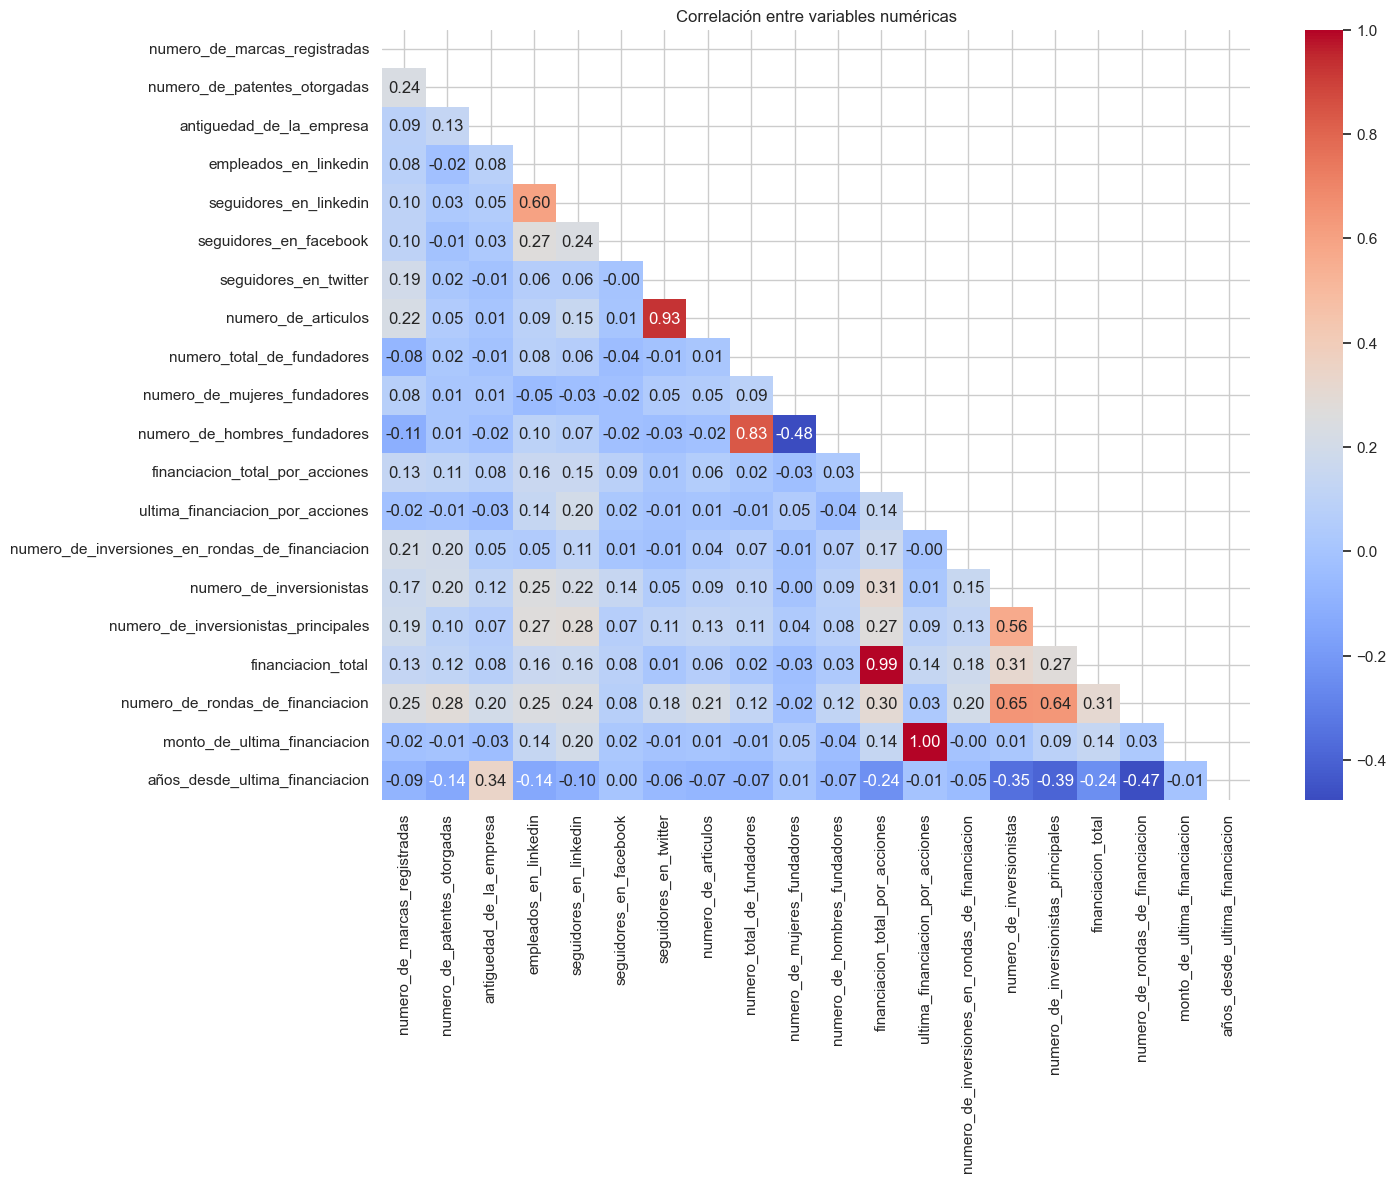

In [11]:
# Matriz de correlación
corr = df.select_dtypes(include='number').corr()

# Mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(corr))
plt.title("Correlación entre variables numéricas")
plt.show()

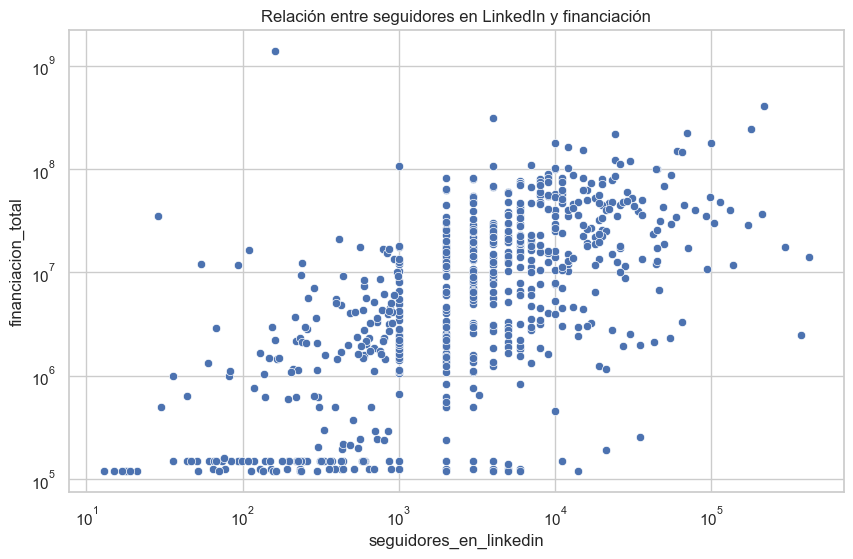

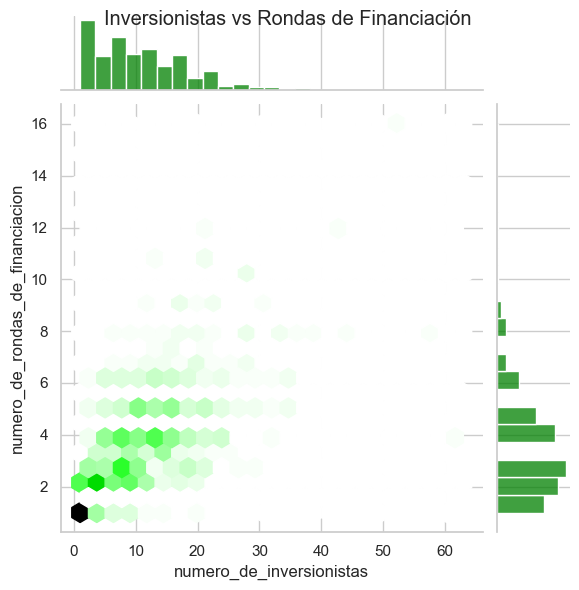

In [12]:
# Relación entre financiación total y seguidores en redes
sns.scatterplot(data=df, x="seguidores_en_linkedin", y="financiacion_total")
plt.xscale("log")
plt.yscale("log")
plt.title("Relación entre seguidores en LinkedIn y financiación")
plt.show()

# Relación entre número de inversores y número de rondas
sns.jointplot(data=df, x="numero_de_inversionistas", y="numero_de_rondas_de_financiacion", kind="hex", color="green")
plt.suptitle("Inversionistas vs Rondas de Financiación")
plt.show()


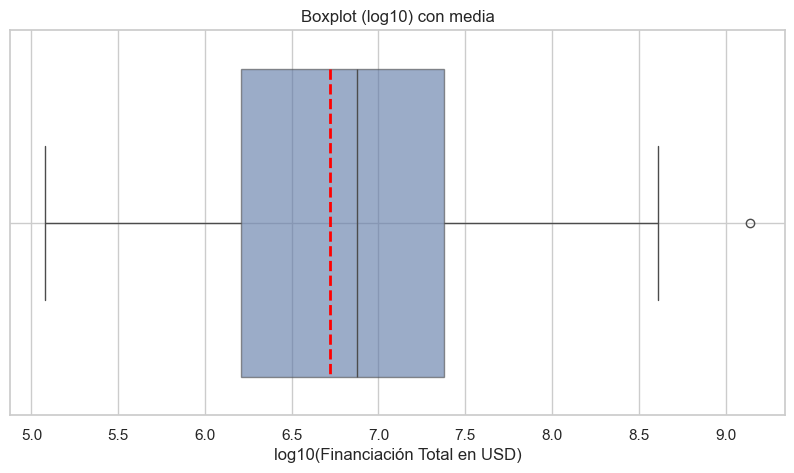

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df['log_financiacion_total'] = df['financiacion_total'].apply(lambda x: np.log10(x) if x > 0 else None)

plt.figure(figsize=(10, 5))
sns.boxplot(
    x=df['log_financiacion_total'],
    showmeans=True,
    meanline=True,
    meanprops={"color": "red", "linestyle": "--", "linewidth": 2},
    boxprops=dict(alpha=.6)
)
plt.title("Boxplot (log10) con media")
plt.xlabel("log10(Financiación Total en USD)")
plt.grid(True)
plt.show()


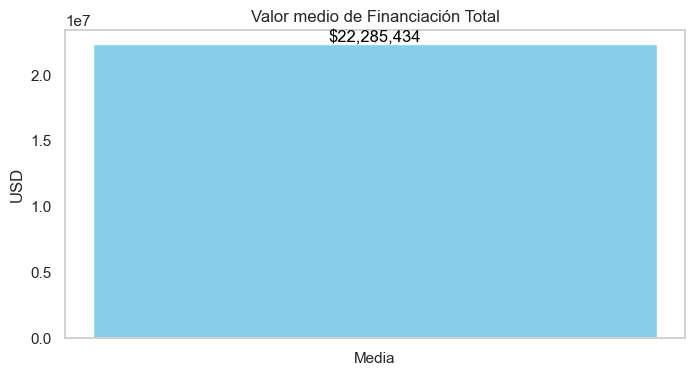

In [14]:
import matplotlib.pyplot as plt

media = df['financiacion_total'].mean()

plt.figure(figsize=(8, 4))
plt.bar(x=['Media'], height=[media], color='skyblue')
plt.text(0, media, f"${media:,.0f}", ha='center', va='bottom', fontsize=12, color='black')
plt.title("Valor medio de Financiación Total")
plt.ylabel("USD")
plt.grid(axis='y')
plt.show()


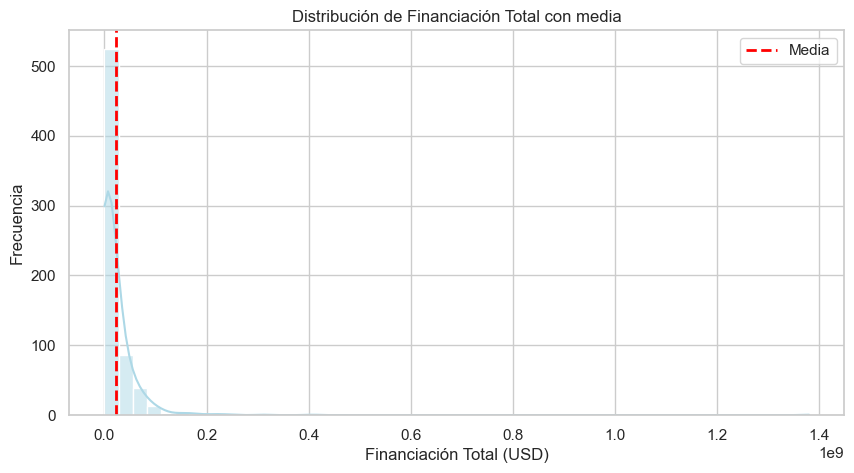

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df['financiacion_total'], bins=50, kde=True, color='lightblue')
plt.axvline(df['financiacion_total'].mean(), color='red', linestyle='--', linewidth=2, label='Media')
plt.title('Distribución de Financiación Total con media')
plt.xlabel('Financiación Total (USD)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()
